In [281]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

RANDOM_STATE = 1

In [248]:
df = pd.read_csv('data/category_data.csv', sep=';', thousands='.')
df.head()

,Year,Week,Index,Product,Sales_packs,Sales_UAH,Penetration,Pricer_per_pack,Brand,Aw_MMI,Internet_insertions,Internet_impressions,Internet_real users,TV_TRP,"SOV, %",TRP_category
0,2018,1,20181,"NIMID®, Kusum Pharm LLC (Ukraine, Kiev), gel f...","12180,38","374227,46","84,31","30,7237918685624",NIMID,NaN,0,NaN,NaN,0,0,"728,36"
1,2018,1,20181,"FLAMIDASE GEL, Organosyn Life Sciences (India)...","9104,28","598177,21","75,68","65,7028573374281",FLAMIDASE,NaN,0,NaN,NaN,0,0,"728,36"
2,2018,1,20181,"NIMID®, Kusum Pharm LLC (Ukraine, Kiev), tabs ...","7139,25","943215,62",82,"132,116905837448",NIMID,NaN,0,NaN,NaN,0,0,"728,36"
3,2018,1,20181,"DEEP RELIEF, Delta Medical LLC (Ukraine, Vishn...","6263,29","725660,44","77,45","115,859307169235",DEEP RELIEF,NaN,6,NaN,NaN,0,0,"728,36"
4,2018,1,20181,"NIMID®, Kusum Pharm LLC (Ukraine, Kiev), gel f...","4886,29","401893,65","70,38","82,2492422676509",NIMID,NaN,0,NaN,NaN,0,0,"728,36"


In [249]:
print(f"Number of data before: {len(df)}")
df = df[df['Brand'] == "DEEP RELIEF"]
print(f"Number of data before: {len(df)}")

Number of data before: 6600
Number of data before: 450


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 3 to 6575
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  450 non-null    int64  
 1   Week                  450 non-null    int64  
 2   Index                 450 non-null    int64  
 3   Product               450 non-null    object 
 4   Sales_packs           450 non-null    object 
 5   Sales_UAH             450 non-null    object 
 6   Penetration           444 non-null    object 
 7   Pricer_per_pack       450 non-null    object 
 8   Brand                 450 non-null    object 
 9   Aw_MMI                30 non-null     object 
 10  Internet_insertions   450 non-null    int64  
 11  Internet_impressions  0 non-null      float64
 12  Internet_real users   0 non-null      float64
 13  TV_TRP                450 non-null    object 
 14  SOV, %                444 non-null    object 
 15  TRP_category          

# Baseline

In [270]:
# Preparing train data

X = df.drop(['Year', 'Week', 'Index', 'Product', 'Sales_packs', 'Brand'], axis=1)
X = X.apply(lambda col: col.str.replace(",", ".").astype('float') if col.dtype == 'object' else col, 
        axis=0) # conversion to number format
X.fillna(0, inplace=True)

y = df['Sales_packs'].str.replace(",", ".").astype('float')
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=RANDOM_STATE)

print(f"Train: {len(X_train)}")
print(f"Test: {len(X_test)}")

Train: 360
Test: 90


In [271]:
# Build and evaluate the model

linear_base_model = LinearRegression().fit(X_train, y_train)
y_pred = linear_base_model.predict(X_test)

print(f"Linear regression score: {linear_base_model.score(X_test, y_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Linear regression score: 0.9474851371250061
Mean absolute error: 330.25025000119615
Mean squared error: 475098.2582865516


<AxesSubplot:>

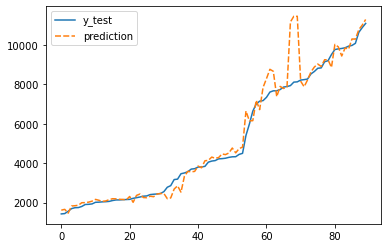

In [272]:
# Visualization of results
res = pd.DataFrame(data={'y_test': y_test, 'prediction': y_pred})
res = res.sort_values(by=['y_test']).reset_index(drop=True)
sns.lineplot(data=res)

# Feature importance

<AxesSubplot:xlabel='importance', ylabel='column'>

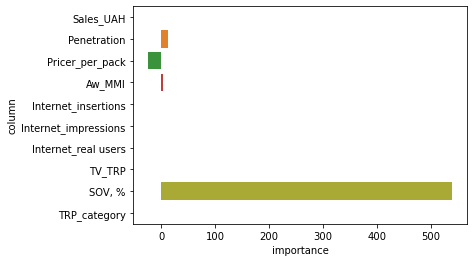

In [273]:
# Create a dataframe with features and their importance
feature_importances = pd.DataFrame({
                                    'column':X_train.columns, 
                                    'importance':linear_base_model.coef_
                                    })
feature_importances
sns.barplot(x=feature_importances['importance'], y=feature_importances['column'])

#### We see that penetration, pricer_per_pack, SOV have the greatest influence

# Data cleansing

In [290]:
# Remove columns with small number of values 
df2 = df.drop(['Internet_impressions', 'Internet_real users', 'Aw_MMI'], axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 3 to 6487
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 438 non-null    int64 
 1   Week                 438 non-null    int64 
 2   Index                438 non-null    int64 
 3   Product              438 non-null    object
 4   Sales_packs          438 non-null    object
 5   Sales_UAH            438 non-null    object
 6   Penetration          438 non-null    object
 7   Pricer_per_pack      438 non-null    object
 8   Brand                438 non-null    object
 9   Internet_insertions  438 non-null    int64 
 10  TV_TRP               438 non-null    object
 11  SOV, %               438 non-null    object
 12  TRP_category         438 non-null    object
dtypes: int64(4), object(9)
memory usage: 47.9+ KB


In [310]:
# Preparing second train data

X2 = df2.drop(['Year', 'Week', 'Index', 'Product', 'Sales_packs', 'Brand'], axis=1)
X2 = X2.apply(lambda col: col.str.replace(",", ".").astype('float') if col.dtype == 'object' else col, 
        axis=0) # conversion to number format
X2.fillna(0, inplace=True)

y2 = df2['Sales_packs'].str.replace(",", ".").astype('float')
y2.fillna(0, inplace=True)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    train_size=0.8,
                                                    random_state=RANDOM_STATE)

# scaler = StandardScaler().fit(X2_train)
# scaler2 = MinMaxScaler().fit(X2_train)
# X2_train = scaler.transform(X2_train)
# X2_test = scaler.transform(X2_test)

print(f"Train: {len(X2_train)}")
print(f"Test: {len(X2_test)}")

Train: 350
Test: 88


In [311]:
# Build and evaluate the second model

linear_model2 = LinearRegression().fit(X2_train, y2_train)
y_pred2 = linear_model2.predict(X2_test)

print(f"Linear regression score: {linear_model2.score(X2_test, y2_test)}")
print(f"Mean absolute error: {mean_absolute_error(y2_test, y_pred2)}")
print(f"Mean squared error: {mean_squared_error(y2_test, y_pred2)}")

Linear regression score: 0.9909790517983355
Mean absolute error: 195.22832817036178
Mean squared error: 80349.26217127299


<AxesSubplot:xlabel='importance', ylabel='column'>

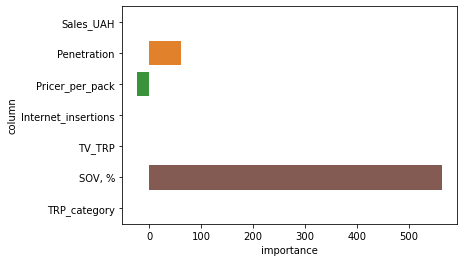

In [312]:
# Create a dataframe with features and their importance
feature_importances2 = pd.DataFrame({
                                    'column':X2_train.columns, 
                                    'importance':linear_model2.coef_
                                    })
feature_importances2
sns.barplot(x=feature_importances2['importance'], y=feature_importances2['column'])

# Data aggregation

In [339]:
df_general_data = pd.read_csv('data/general_data.csv', sep=';', thousands='.')
df_general_data.head()

,Year,Month,Week,Index,IPN,Cons_Inflation,Real wage,UAH_to_USD,Temperature,COVID info-noise,google_requests_for brand
0,2018,1,1,20181,NaN,NaN,NaN,NaN,NaN,0,"9,5"
1,2018,1,2,20182,NaN,NaN,NaN,NaN,NaN,0,11
2,2018,1,3,20183,"59,5","101,5","86,6","28,43","-2,4",0,"13,5"
3,2018,1,4,20184,NaN,NaN,NaN,NaN,NaN,0,"14,5"
4,2018,2,5,20185,NaN,NaN,NaN,NaN,NaN,0,"13,5"


In [323]:
len(df_general_data)

148

In [343]:
df_agg = df.merge(df_general_data, left_on='Index', right_on='Index')
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_x                     444 non-null    int64  
 1   Week_x                     444 non-null    int64  
 2   Index                      444 non-null    int64  
 3   Product                    444 non-null    object 
 4   Sales_packs                444 non-null    object 
 5   Sales_UAH                  444 non-null    object 
 6   Penetration                444 non-null    object 
 7   Pricer_per_pack            444 non-null    object 
 8   Brand                      444 non-null    object 
 9   Aw_MMI                     30 non-null     object 
 10  Internet_insertions        444 non-null    int64  
 11  Internet_impressions       0 non-null      float64
 12  Internet_real users        0 non-null      float64
 13  TV_TRP                     444 non-null    object 

In [364]:
# Preparing train data from aggregated data


columns_to_remove = ['Internet_impressions', 'Internet_real users', 'Aw_MMI', 'Year_x', 'Year_y', 'Week_x', 'Week_y', 'Month', 'Index', 'Product', 'Sales_packs', 'Brand']
X_agg = df_agg.drop(columns_to_remove, axis=1)

X_agg = X_agg.apply(lambda col: col.str.replace(",", ".").astype('float') if col.dtype == 'object' else col, 
        axis=0)
X_agg.fillna(0, inplace=True)

y_agg = df_agg['Sales_packs'].str.replace(",", ".").astype('float')
y_agg.fillna(0, inplace=True)

X_agg_train, X_agg_test, y_agg_train, y_agg_test = train_test_split(X_agg,
                                                    y_agg,
                                                    train_size=0.8,
                                                    random_state=RANDOM_STATE)

print(f"Train: {len(X_agg_train)}")
print(f"Test: {len(X_agg_test)}")

Train: 355
Test: 89


Linear regression score: 0.9902798842963285
Mean absolute error: 182.48722815799456
Mean squared error: 74044.92835996707


<AxesSubplot:xlabel='importance', ylabel='column'>

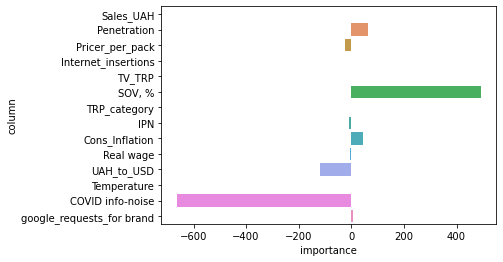

In [366]:
# Build and evaluate the second model

linear_model3 = LinearRegression().fit(X_agg_train, y_agg_train)
y_pred3 = linear_model3.predict(X_agg_test)

print(f"Linear regression score: {linear_model3.score(X_agg_test, y_agg_test)}")
print(f"Mean absolute error: {mean_absolute_error(y_agg_test, y_pred3)}")
print(f"Mean squared error: {mean_squared_error(y_agg_test, y_pred3)}")

# Create a dataframe with features and their importance
feature_importances3 = pd.DataFrame({
                                    'column':X_agg_train.columns, 
                                    'importance':linear_model3.coef_
                                    })
sns.barplot(x=feature_importances3['importance'], y=feature_importances3['column'])

### We observe that the SOV value continues to have a big impact, however, the information noise from COVID-19 worsens sales and has a greater impact than SOV. The dollar exchange rate also has a negative impact.

### The main recommendation for increasing sales in this case would be to increase advertising activity while reducing the information noise about COVID-19